In [1]:
#First peek into the database. What does it contain?
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
df = pd.read_csv('professions.csv', sep = '|', index_col = 'user_id')
df.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [2]:
#Preparing the database for machine learning, we need to create a new "1" and "0" column

def gender_to_numeric(x):
    if x == 'M':
        return 1
    else:
        return 0

In [3]:
df['binary_gender'] = df.gender.apply(gender_to_numeric)
df.head()

,age,gender,occupation,zip_code,binary_gender
user_id,,,,,
1,24,M,technician,85711,1
2,53,F,other,94043,0
3,23,M,writer,32067,1
4,24,M,technician,43537,1
5,33,F,other,15213,0


In [4]:
#Creating another column to check if the person is of legal age
def older_than_18(x):
    if x >= 18:
        return 'Older'
    else:
        return 'Child'
df['Legal age'] = df.age.apply(older_than_18)
df.head()

,age,gender,occupation,zip_code,binary_gender,Legal age
user_id,,,,,,
1,24,M,technician,85711,1,Older
2,53,F,other,94043,0,Older
3,23,M,writer,32067,1,Older
4,24,M,technician,43537,1,Older
5,33,F,other,15213,0,Older


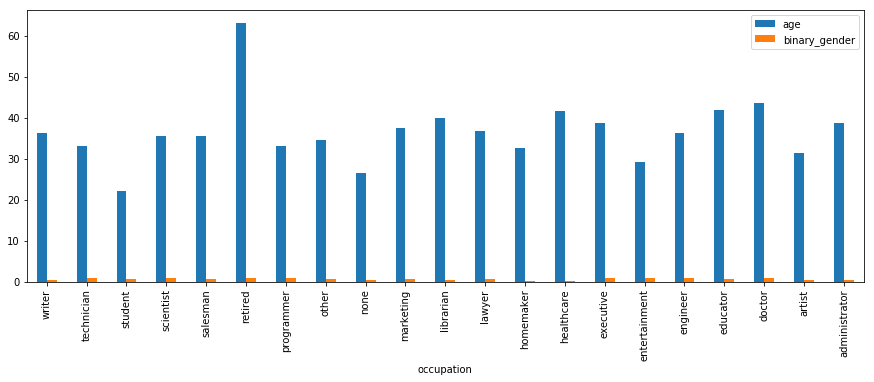

In [47]:
#Visualizing a subset of the data
df.groupby('occupation').mean().sort_values(by = 'occupation', ascending = False).plot(kind = 'bar', figsize = (15,5))

In [6]:
#Exploring other substs of the data. In this case we demostrate the use of multiple-variable selection
df[(df['age'] >= 43) & (df['occupation'] == 'writer' ) & (df['binary_gender'] == 0 ) ]

,age,gender,occupation,zip_code,binary_gender,Legal age
user_id,,,,,,
236,44,F,writer,53214,0,Older
389,44,F,writer,83702,0,Older
491,43,F,writer,53711,0,Older
503,50,F,writer,27514,0,Older
518,49,F,writer,99709,0,Older
558,56,F,writer,63132,0,Older
736,48,F,writer,94618,0,Older


In [7]:
#Changing the index column
df.set_index('age', inplace = True)
df.head()

,gender,occupation,zip_code,binary_gender,Legal age
age,,,,,
24,M,technician,85711,1,Older
53,F,other,94043,0,Older
23,M,writer,32067,1,Older
24,M,technician,43537,1,Older
33,F,other,15213,0,Older


In [16]:
#reverting the index to its original value
df.reset_index(inplace = True)
df.head()

,age,gender,occupation,zip_code,binary_gender,Legal age
0,24,M,technician,85711,1,Older
1,53,F,other,94043,0,Older
2,23,M,writer,32067,1,Older
3,24,M,technician,43537,1,Older
4,33,F,other,15213,0,Older


In [17]:
#Exercising the creation of an additional column using a different method to the one used previously
df['young_male'] = ((df.gender == 'M') & (df.age < 30)).map({True: 'young male', False: 'other'})
df.head()

,age,gender,occupation,zip_code,binary_gender,Legal age,young_male
0,24,M,technician,85711,1,Older,young male
1,53,F,other,94043,0,Older,other
2,23,M,writer,32067,1,Older,young male
3,24,M,technician,43537,1,Older,young male
4,33,F,other,15213,0,Older,other


In [18]:
#Counting how many persons are present at each age range
df.age.value_counts().count

<bound method Series.count of 30    39
25    38
22    37
28    36
27    35
26    34
24    33
29    32
20    32
32    28
23    28
35    27
21    27
33    26
31    25
19    23
44    23
39    22
40    21
36    21
42    21
51    20
50    20
48    20
49    19
37    19
18    18
34    17
38    17
45    15
      ..
47    14
43    13
46    12
53    12
55    11
41    10
57     9
60     9
52     6
56     6
15     6
13     5
16     5
54     4
63     3
14     3
65     3
70     3
61     3
59     3
58     3
64     2
68     2
69     2
62     2
11     1
10     1
73     1
66     1
7      1
Name: age, Length: 61, dtype: int64>

In [19]:
#Visualizing mean age values for each profession
df.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [29]:
#Practising the creation of pivot tables
df.pivot_table(index = 'occupation', values = ['binary_gender', 'age'])

,age,binary_gender
occupation,,
administrator,38.746835,0.544304
artist,31.392857,0.535714
doctor,43.571429,1.000000
educator,42.010526,0.726316
engineer,36.388060,0.970149
entertainment,29.222222,0.888889
executive,38.718750,0.906250
healthcare,41.562500,0.312500
homemaker,32.571429,0.142857


In [41]:
#Applying a Python list comprehension to the Pandas' data
y = df.groupby('occupation')
x = [el for el in y]
x

[('administrator',
       age gender     occupation zip_code  binary_gender Legal age  young_male
  6     57      M  administrator    91344              1     Older       other
  7     36      M  administrator    05201              1     Older       other
  33    38      F  administrator    42141              0     Older       other
  41    30      M  administrator    17870              1     Older       other
  47    45      M  administrator    12550              1     Older       other
  61    27      F  administrator    97214              0     Older       other
  71    48      F  administrator    73034              0     Older       other
  77    26      M  administrator    61801              1     Older  young male
  78    39      F  administrator    03755              0     Older       other
  79    34      F  administrator    52241              0     Older       other
  85    26      M  administrator    46005              1     Older  young male
  86    47      M  administrator 

In [46]:
#Further exploration of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 7 columns):
age              943 non-null int64
gender           943 non-null object
occupation       943 non-null object
zip_code         943 non-null object
binary_gender    943 non-null int64
Legal age        943 non-null object
young_male       943 non-null object
dtypes: int64(2), object(5)
memory usage: 51.6+ KB
